In [42]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 279.3 kB/s eta 0:00:33
     ---------------------------------------- 0.1/9.2 MB 476.3 kB/s eta 0:00:20
      --------------------------------------- 0.2/9.2 MB 697.2 kB/s eta 0:00:13
     - -------------------------------------- 0.2/9.2 MB 838.1 kB/s eta 0:00:11
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s eta 0:00:10
     - -------------------------------------- 0.3/9.2 MB 916.0 kB/s

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings 
warnings.filterwarnings('ignore')

## Transaction

In [6]:
Transaction = pd.read_csv("Transaction.csv")

In [7]:
Transaction.head()

,Trans_ID,CustID,Date,ProductID,Price,Qty,Total,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [8]:
Transaction.tail()

,Trans_ID,CustID,Date,ProductID,Price,Qty,Total,StoreID
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13
5019,TR85684,55,31/12/2022,P8,16000,1,16000,6


In [9]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Trans_ID   5020 non-null   object
 1   CustID     5020 non-null   int64 
 2   Date       5020 non-null   object
 3   ProductID  5020 non-null   object
 4   Price      5020 non-null   int64 
 5   Qty        5020 non-null   int64 
 6   Total      5020 non-null   int64 
 7   StoreID    5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [42]:
Transaction["Date"]=pd.to_datetime(Transaction["Date"], format= '%d/%m/%Y')
print(Transaction)

     Trans_ID  CustID       Date ProductID  Price  Qty  Total  StoreID
0     TR11369     328 2022-01-01        P3   7500    4  30000       12
1     TR16356     165 2022-01-01        P9  10000    7  70000        1
2      TR1984     183 2022-01-01        P1   8800    4  35200        4
3     TR35256     160 2022-01-01        P1   8800    7  61600        4
4     TR41231     386 2022-01-01        P9  10000    1  10000        4
...       ...     ...        ...       ...    ...  ...    ...      ...
5015  TR54423     243 2022-12-31       P10  15000    5  75000        3
5016   TR5604     271 2022-12-31        P2   3200    4  12800        9
5017  TR81224      52 2022-12-31        P7   9400    6  56400        9
5018  TR85016      18 2022-12-31        P8  16000    3  48000       13
5019  TR85684      55 2022-12-31        P8  16000    1  16000        6

[5020 rows x 8 columns]


In [11]:
Transaction.isna().sum()

Trans_ID     0
CustID       0
Date         0
ProductID    0
Price        0
Qty          0
Total        0
StoreID      0
dtype: int64

## Customer

In [12]:
Customer = pd.read_csv("Customer.csv")

In [13]:
Customer.head()

,CustID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [14]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustID          447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [15]:
Customer.isna().sum()

CustID            0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [16]:
Customer.replace(np.nan,'No status',inplace=True)

In [17]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustID          447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


## Product

In [18]:
Product = pd.read_csv("Product.csv")

In [19]:
Product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [20]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


## Store

In [21]:
Store = pd.read_csv("Store.csv")

In [22]:
Store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [23]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [24]:
## menggabungkan data menjadi satu data
kalbe = pd.merge(Transaction,Customer,on='CustID', how='inner')
print(kalbe)

     Trans_ID  CustID       Date ProductID  Price  Qty  Total  StoreID  Age  \
0     TR11369     328 2022-01-01        P3   7500    4  30000       12   36   
1     TR67395     328 2022-01-22        P8  16000    3  48000       11   36   
2     TR89012     328 2022-03-25        P5   4200    5  21000        6   36   
3     TR97172     328 2022-05-21        P1   8800    5  44000        1   36   
4     TR57013     328 2022-09-15        P7   9400    6  56400        1   36   
...       ...     ...        ...       ...    ...  ...    ...      ...  ...   
5015  TR27321     441 2022-08-11        P4  12000    2  24000       10   19   
5016  TR16832     441 2022-08-25        P6  18000    1  18000        6   19   
5017  TR81827     441 2022-09-05        P5   4200    3  12600        2   19   
5018  TR61352     441 2022-09-28        P5   4200    3  12600        1   19   
5019  TR29879     441 2022-12-25        P4  12000    4  48000       14   19   

      Gender Marital Status Income  
0          0  

In [25]:
kalbe1 = pd.merge(kalbe, Product, on='ProductID', how='inner')
print(kalbe1)

     Trans_ID  CustID       Date ProductID  Price_x  Qty  Total  StoreID  Age  \
0     TR11369     328 2022-01-01        P3     7500    4  30000       12   36   
1     TR20170     165 2022-07-23        P3     7500    2  15000       13   44   
2     TR80016     183 2022-01-24        P3     7500    2  15000       10   27   
3     TR89318     183 2022-07-17        P3     7500    1   7500       12   27   
4     TR82094     183 2022-09-15        P3     7500    2  15000        1   27   
...       ...     ...        ...       ...      ...  ...    ...      ...  ...   
5015  TR56886     317 2022-12-13        P4    12000    1  12000       11   55   
5016  TR19361     348 2022-05-29        P4    12000    3  36000        7   29   
5017  TR35558     192 2022-09-12        P4    12000    2  24000       10   26   
5018  TR27321     441 2022-08-11        P4    12000    2  24000       10   19   
5019  TR29879     441 2022-12-25        P4    12000    4  48000       14   19   

      Gender Marital Status

In [26]:
kalbe2=pd.merge(kalbe1, Store, on='StoreID', how='inner')
print(kalbe2)

     Trans_ID  CustID       Date ProductID  Price_x  Qty  Total  StoreID  Age  \
0     TR11369     328 2022-01-01        P3     7500    4  30000       12   36   
1     TR89318     183 2022-07-17        P3     7500    1   7500       12   27   
2      TR9106     123 2022-09-26        P3     7500    4  30000       12   34   
3      TR4331     335 2022-01-08        P3     7500    3  22500       12   29   
4      TR6445     181 2022-01-10        P3     7500    4  30000       12   33   
...       ...     ...        ...       ...      ...  ...    ...      ...  ...   
5015  TR69555     221 2022-08-01        P4    12000    3  36000        4   23   
5016  TR21587     425 2022-10-17        P4    12000    1  12000        4   58   
5017  TR51183     409 2022-07-19        P4    12000    1  12000        4   47   
5018  TR14963     374 2022-12-16        P4    12000    5  60000        4   32   
5019  TR40750     271 2022-11-30        P4    12000    3  36000        4   29   

      Gender Marital Status

In [27]:
kalbe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Trans_ID        5020 non-null   object        
 1   CustID          5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   Total           5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   object        
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [28]:
kalbe2.head()

,Trans_ID,CustID,Date,ProductID,Price_x,Qty,Total,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [29]:
kalbe2.tail()

,Trans_ID,CustID,Date,ProductID,Price_x,Qty,Total,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5019,TR40750,271,2022-11-30,P4,12000,3,36000,4,29,0,Married,"4,74",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [30]:
kalbe2 = kalbe2.drop("Price_y", axis=1)
kalbe2.head()

,Trans_ID,CustID,Date,ProductID,Price_x,Qty,Total,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [31]:
kalbe2.rename(columns={"Price_x":"Price","Product Name":"Product_Name","Marital Status":"Marital_status","StoreName":"Store_name","GroupStore":"Group_store"}, inplace=True)

In [32]:
kalbe2.isna().sum()

Trans_ID          0
CustID            0
Date              0
ProductID         0
Price             0
Qty               0
Total             0
StoreID           0
Age               0
Gender            0
Marital_status    0
Income            0
Product_Name      0
Store_name        0
Group_store       0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [44]:
regression = kalbe2.groupby(['Date']).agg({'Qty':'sum'}).reset_index()
print(regression)

          Date  Qty
0   2022-01-01   49
1   2022-01-02   59
2   2022-01-03   63
3   2022-01-04   45
4   2022-01-05   30
..         ...  ...
360 2022-12-27   70
361 2022-12-28   68
362 2022-12-29   42
363 2022-12-30   44
364 2022-12-31   37

[365 rows x 2 columns]


In [45]:
regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


# Linear Regression ARIMA

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

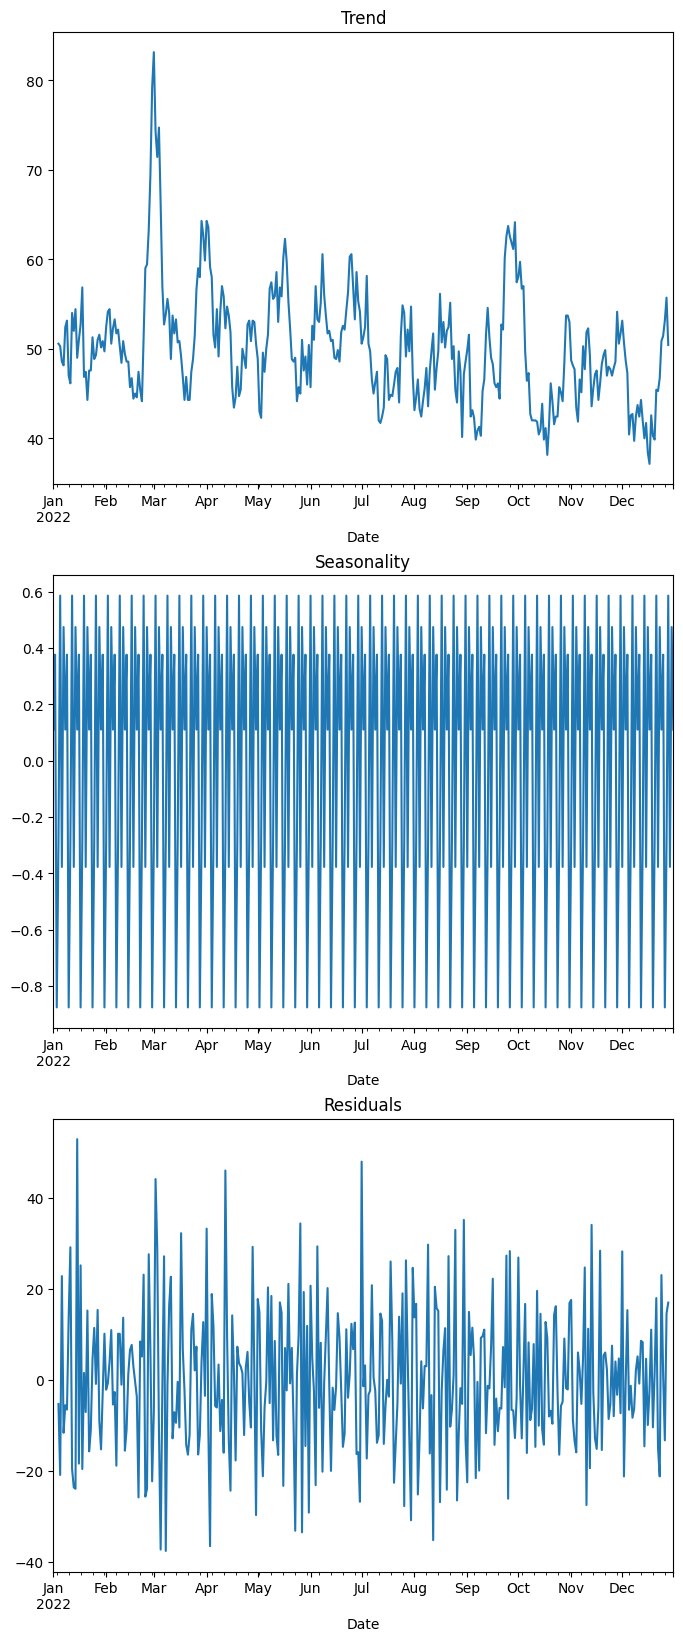

In [55]:
# visualisasi trend , seasonal, dan residual
decomposed = seasonal_decompose(regression.set_index('Date'))
plt.figure(figsize=(8,20))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout

In [56]:
#pemodelan data train & test
xyz = round(regression.shape[0]*0.9)
train=regression[:xyz]
test=regression[xyz:].reset_index(drop=True)
train.shape,test.shape

((328, 2), (37, 2))

<Axes: xlabel='Date', ylabel='Qty'>

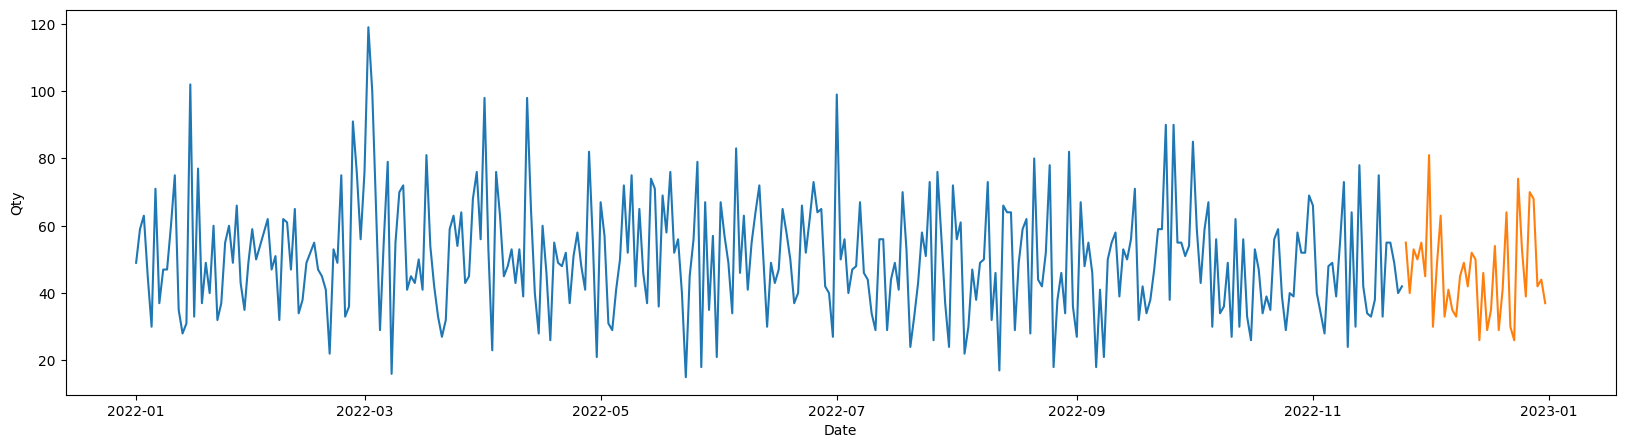

In [57]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train,x=train['Date'], y= train['Qty'])
sns.lineplot(data=test, x=test['Date'],y=test['Qty'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

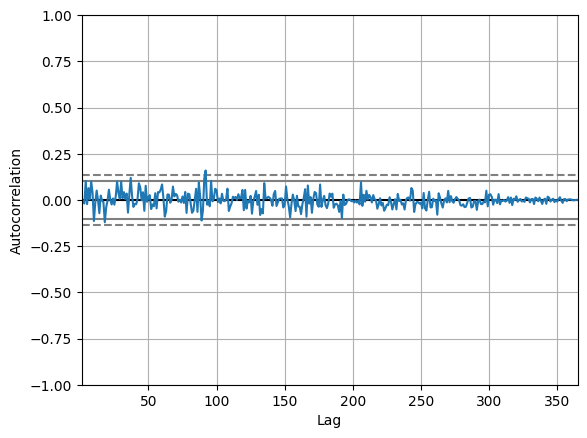

In [58]:
#uji autokorelasi 
autocorrelation_plot(regression['Qty'])

In [59]:
def rase (y_actual, y_pred): #fungsi untuk menghitung RMSE
    print (f'RMSE value{mean_squared_error(y_actual, y_pred)**0.5}')
def eval (y_actual,y_pred): #untuk eval machine learning modelling
    rase(y_actual,y_pred)
    print (f'MAE value {mean_absolute_error(y_actual,y_pred)}')

RMSE value14.29810944232704
MAE value 11.304221789090098


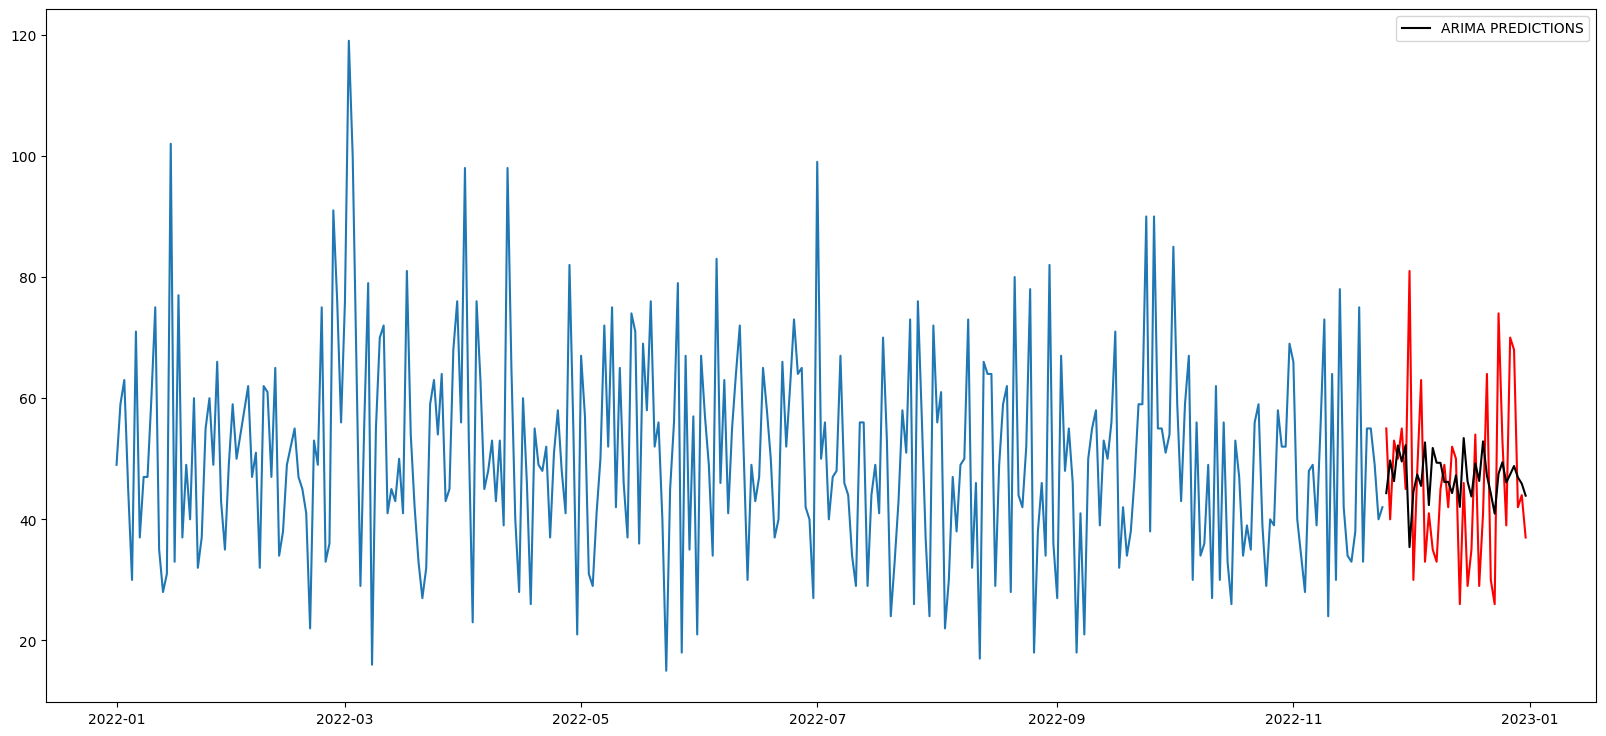

In [60]:
# ARIMA TEST
train = train.set_index('Date')
test = test.set_index('Date')

y=train['Qty']

ARIMAmodel = ARIMA(y, order= (40,2,1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test))

y_pred_regression = y_pred.conf_int()
y_pred_regression['predictions'] = ARIMAmodel.predict(start=y_pred_regression.index[0], end=y_pred_regression.index[-1])
y_pred_regression.index = test.index
y_pred_out = y_pred_regression['predictions']
eval(test['Qty'],y_pred_out)

plt.figure(figsize=(20,9))
plt.plot(train['Qty'])
plt.plot(test['Qty'],color='red')
plt.plot(y_pred_out, color='black', label= 'ARIMA PREDICTIONS')
plt.legend()